In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
from impala.dbapi import connect
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',1000)
from matplotlib.font_manager import FontProperties
chinese = FontProperties(fname = 'C:/Windows/Fonts/msyh.ttc')
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# data = pd.read_csv("D:/GitHub/datasets/190821_ShopOrders.csv")

# 查询所有字段
# def list_col(localhost,database, port,tabls_name):
#     db = connect(localhost,port,database)
#     cursor = db.cursor()
#     cursor.execute("select * from %s" % tabls_name)
#     col_name_list = [tuple[0] for tuple in cursor.description]
#     db.close()
#     return col_name_list

# # 列出所有的表
# def list_table(localhost,database,port):
#     db = connect(localhost,database,port)
#     cursor = db.cursor()
#     cursor.execute("show tables")
#     table_list = [tuple[0] for tuple in cursor.fetchall()]
#     db.close()
#     return table_list

# # 数据库信息
# port = 21050 # 端口号
# host = "172.22.210.29" # 连接地址
# database = "bigtables" # 数据库名
# tabls_name = "shop_order" # 表名

# table_names = list_table(host,port,database) 
# # print('库中所有表名:',*table_names,sep = '\n  ')
# column_names = list_col(host,database, port,tabls_name)
# # column_names = ["user_id","create_date","payable_rmb_amount","buy_num","status"]
# # print('表中所有字段名:',*column_names,sep = '\n  ')

# conn = connect(host=host,port =port , database = database,timeout=3600 )
# cur_data = conn.cursor()
# cur_data.execute('''SELECT *
# from shop_order 
# where create_date between "2019-01-01 00:00:00" AND "2019-07-31 23:59:59";''')
# data=cur_data.fetchall()
# data = pd.DataFrame(data,columns=column_names)

# data = pd.read_csv("D:/GitHub/datasets/shop_order_190101_190731.csv")

In [3]:
# data.shape
# data1 = data.copy()
# data1 = data1[data1["status"] == 1]
# data1.shape
# df = data1[["user_id","create_date","payable_rmb_amount","buy_num"]]
# df["create_date"] = pd.to_datetime(df["create_date"])
# df["date"] = df["create_date"].dt.date
# df["month"] = df["date"].values.astype('datetime64[M]')

In [4]:
df = pd.read_csv("D:/GitHub/datasets/shop_order_190101_190731.csv")
# df.to_csv("D:/GitHub/datasets/shop_order_190101_190731.csv",index=False)


In [5]:
df.head()

,user_id,create_date,payable_rmb_amount,buy_num,date,month
0,3059210,2019/1/1 7:32,7.0,1,2019/1/1,2019/1
1,2055349,2019/1/1 7:38,7.0,1,2019/1/1,2019/1
2,9457140,2019/1/1 8:46,7.0,1,2019/1/1,2019/1
3,9937889,2019/1/1 11:04,7.0,1,2019/1/1,2019/1
4,4963922,2019/1/1 11:19,7.0,1,2019/1/1,2019/1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213843 entries, 0 to 213842
Data columns (total 6 columns):
user_id               213843 non-null int64
create_date           213843 non-null object
payable_rmb_amount    213843 non-null float64
buy_num               213843 non-null int64
date                  213843 non-null object
month                 213843 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 9.8+ MB


In [7]:
# 共222983单支付成功，平均每单消费7.16元，75%消费6元以下
df.describe()

,user_id,payable_rmb_amount,buy_num
count,2.138430e+05,213843.000000,213843.0
mean,5.663011e+06,7.237698,1.0
std,4.104763e+06,14.468073,0.0
min,3.000000e+00,0.000000,1.0
25%,2.104415e+06,3.990000,1.0
50%,4.503539e+06,4.990000,1.0
75%,9.526026e+06,5.990000,1.0
max,1.697181e+07,299.000000,1.0


In [8]:
# 按用户分组
user_grouped = df.groupby("user_id").sum()

In [9]:
user_grouped.head()

,payable_rmb_amount,buy_num
user_id,,
3,0.99,1
11,0.00,1
13,0.00,1
16,1.98,2
35,0.00,1


In [10]:
# 用户数101911人(截止190822下午)，人均消费15.65元.75%用户消费17元以下
# 
user_grouped.describe()

,payable_rmb_amount,buy_num
count,100102.000000,100102.000000
mean,15.461539,2.136251
std,28.469532,2.367325
min,0.000000,1.000000
25%,3.990000,1.000000
50%,7.000000,1.000000
75%,16.990000,2.000000
max,1062.550000,262.000000


Text(0.5, 1.0, '各月用户支付金额')

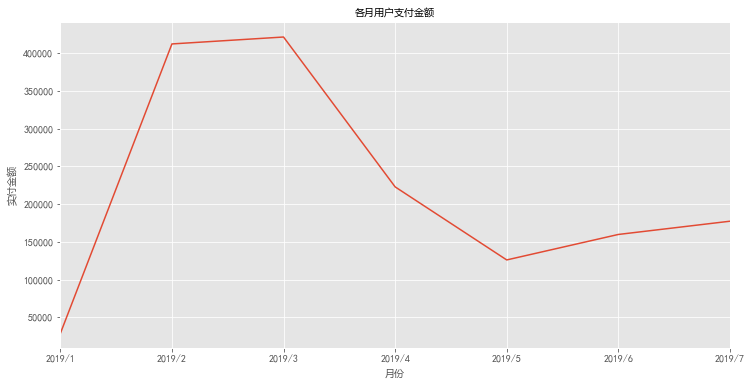

In [11]:
plt.figure(figsize = (12,6))
ax = df.groupby('month').payable_rmb_amount.sum().plot()
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("实付金额",fontproperties=chinese)
ax.set_title("各月用户支付金额",fontproperties=chinese)

In [12]:
df.groupby('month').payable_rmb_amount.sum()

month
2019/1     28544.64
2019/2    412093.04
2019/3    421263.63
2019/4    222778.42
2019/5    126009.79
2019/6    159751.58
2019/7    177289.85
Name: payable_rmb_amount, dtype: float64

#### 19年2-3月销量达到高峰，之后4-5出现一次大幅下降，最后趋于平稳

Text(0.5, 1.0, '各月用户购买商品数(订单数)')

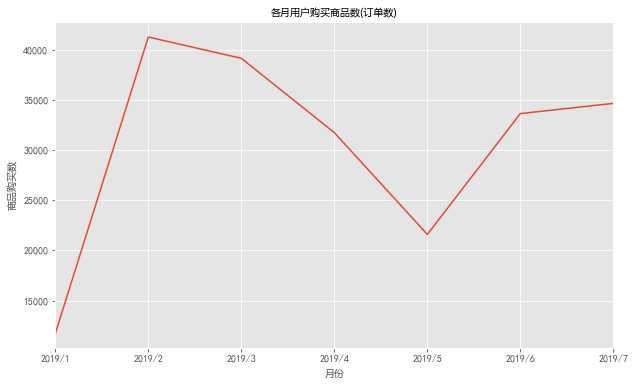

In [13]:
plt.figure(figsize = (10,6))
ax = df.groupby('month').buy_num.sum().plot()
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("商品购买数",fontproperties=chinese)
ax.set_title("各月用户购买商品数(订单数)",fontproperties=chinese)

##### 4月销量下滑趋势没有金额幅度大，可能是商品价格下降导致

Text(0.5, 1.0, '各用户实付金额与购买商品数关系')

<Figure size 720x432 with 0 Axes>

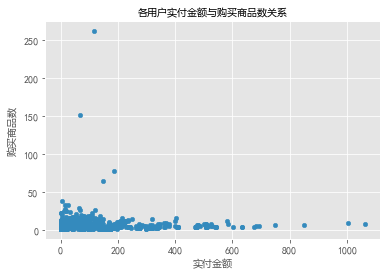

In [14]:
plt.figure(figsize = (10,6))
ax = df.groupby('user_id').sum().plot.scatter("payable_rmb_amount","buy_num")
ax.set_xlabel("实付金额",fontproperties=chinese)
ax.set_ylabel("购买商品数",fontproperties=chinese)
ax.set_title("各用户实付金额与购买商品数关系",fontproperties=chinese)

#### 总体还算正常，有极少数异常值，但数量不够影响全局

Text(0.5, 1.0, '用户购买商品数分布')

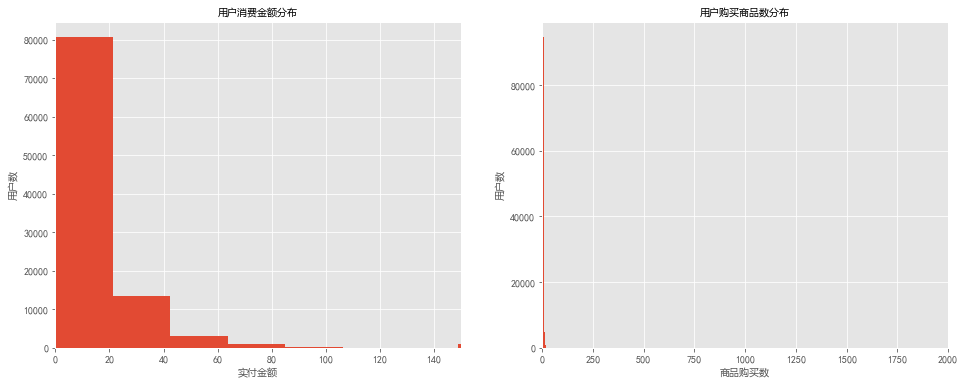

In [15]:
# 画个直方图看看分布
plt.figure(figsize=(16,6))
plt.subplot(121)
ax = df.groupby("user_id")["payable_rmb_amount"].sum().hist(bins = 50)
ax.set_xlabel("实付金额",fontproperties=chinese)
ax.set_ylabel("用户数",fontproperties=chinese)
ax.set_xlim(0,150)
ax.set_title("用户消费金额分布",fontproperties = chinese)
plt.subplot(122)
ax = df.groupby('user_id').buy_num.count().hist(bins = 50)
ax.set_xlabel('商品购买数',fontproperties = chinese)
ax.set_ylabel("用户数",fontproperties = chinese)
ax.set_xlim(0,2000)
ax.set_title("用户购买商品数分布",fontproperties = chinese)

In [16]:
print("用户首次消费月份(每月新客数)")
print(df.groupby("user_id").month.min().value_counts())

用户首次消费月份(每月新客数)
2019/2    35107
2019/3    22006
2019/4    12294
2019/1    10948
2019/6     9280
2019/5     6047
2019/7     4420
Name: month, dtype: int64


In [17]:
print("用户末次消费月份：(末次消费)")
print(df.groupby('user_id').month.max().value_counts())

用户末次消费月份：(末次消费)
2019/2    27444
2019/3    18383
2019/7    17068
2019/4    13504
2019/6    11099
2019/1     7496
2019/5     5108
Name: month, dtype: int64


### 复购率:当月购买2次及以上为复购用户

In [18]:
# 算出每个用户下单月份
df_FuGou = df.pivot_table(index='user_id',columns='month',
                             values='date',aggfunc='count').fillna(0)
# df_FuGou.head(10)

In [19]:
# 数据转化，消费两次及以上的记为1，一次记为0，没有消费记为NaN
df_FuGou_transf = df_FuGou.applymap(lambda x:1 if x > 1 else np.NaN if x == 0 else 0)

Text(0.5, 1.0, '各月复购率')

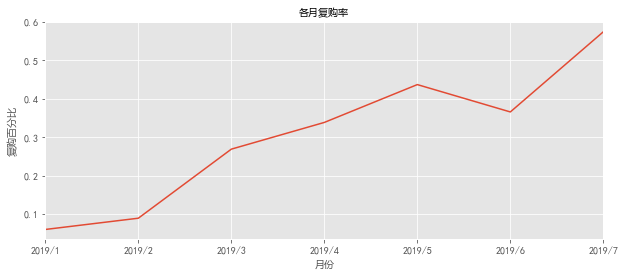

In [20]:
#计算复购率并作图
ax = (df_FuGou_transf.sum()/df_FuGou_transf.count()).plot(figsize = (10,4))
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("复购百分比",fontproperties=chinese)
ax.set_title("各月复购率",fontproperties=chinese)

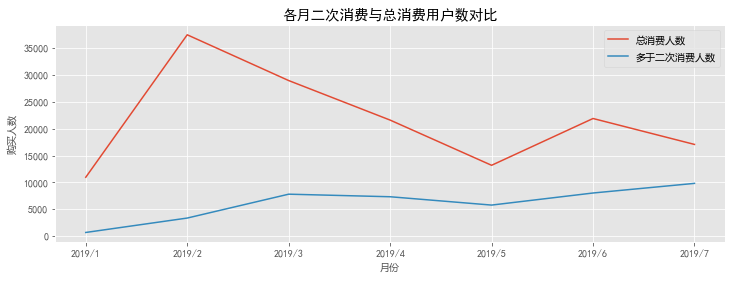

In [21]:
# 细分一下

fig , ax = plt.subplots(figsize = (12,4))
ax.plot(df_FuGou_transf.count())
ax.plot(df_FuGou_transf.sum())
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("购买人数",fontproperties=chinese)
ax.set_title("各月二次消费与总消费用户数对比")
legends = ["总消费人数","多于二次消费人数"]
ax.legend(legends,prop=chinese,loc='upper right')

##### 复购人数从19年3月起开始趋于稳定，证明沉淀下来此部分用户忠诚度很高。

### 回购率：某时间段内消费的用户，在下个时间周期内仍消费的占比。

In [22]:
# 算出每个用户各月购买次数
df_HuiGou = df.pivot_table(index="user_id",columns="month",
                          values="date",aggfunc='count').fillna(0)
# df_HuiGou.head()

In [23]:
# 数据转化，购买过为1，没买为0
df_HuiGou_transf = df_HuiGou.applymap(lambda x:1 if x>0 else 0)
# df_HuiGou_transf.head(10)

In [24]:
#定义函数，每个月都要跟后面一个月对比下，
#本月有消费且下月也有消费，则本月记为1，
#本月有消费且下月没有消费，则本月记为0，
#本月没有消费则为NaN，
#由于最后个月没有下月数据，规定全为NaN
def purchase_return(data):
    status = []
    for i in range(6):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)       
    return pd.Series(status)
#     return status
    

In [25]:
df_HuiGou_return = df_HuiGou_transf.apply(purchase_return, axis = 1)
# df_HuiGou_return.head()

In [26]:
# 出图看看
columns = df.month.sort_values().unique()
df_HuiGou_return.columns = columns

Text(0.5, 1.0, '各月回购率')

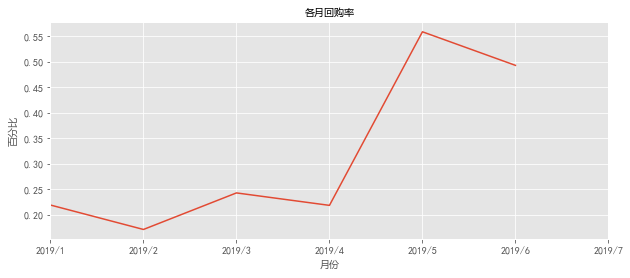

In [27]:
ax = (df_HuiGou_return.sum()/df_HuiGou_return.count()).plot(figsize = (10,4))
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("百分比",fontproperties=chinese)
ax.set_title("各月回购率",fontproperties=chinese)

##### 6，7月上了什么产品或活动吗？ 回购率超过50%

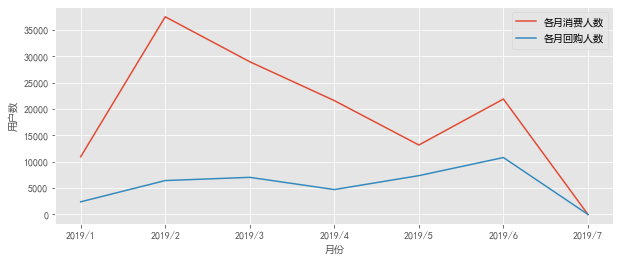

In [28]:
# 细化一下

fig,ax = plt.subplots(figsize = (10,4))
ax.plot(df_HuiGou_return.count()) # 消费人数
ax.plot(df_HuiGou_return.sum()) # 回购人数
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("用户数",fontproperties=chinese)
legends = ["各月消费人数","各月回购人数"]
ax.legend(legends,prop=chinese,loc="upper right")

#####  与复购人数接近，5000-10000，趋势平稳，证明这部分用户已经养成了固定使用消费习惯。应该是同一拨人，稍后会验证一下。 但是7月表现出下滑趋势。

#### 2率都呈现上升趋势，后几个月基本与总消费人数变化趋势相近

### 用户分层
##### 新用户的定义是第一次消费。活跃用户即老客，在某一个时间窗口内有过消费。不活跃用户则是时间窗口内没有消费过的老客。回流用户是在上一个窗口中没有消费，而在当前时间窗口内有过消费。以上的时间窗口都是按月统计。

In [29]:
def active_status(data):
    status = []
    for i in range(7):
        
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == '未注册':
                    status.append('未注册')
                else:
                    status.append('不活跃')
            else:
                status.append('未注册')
                
        # 若本月有消费
        else:
            if len(status) == 0:
                status.append('新客')
            else:
                if status[i-1] == '不活跃':
                    status.append('回流用户')
                elif status[i-1] == '未注册':
                    status.append('新客')
                else:
                    status.append('活跃')
    return status

In [30]:
# df_PurchaseStatus = 
df_FenCeng = df.pivot_table(index="user_id",columns="month",
                          values="date",aggfunc='count').fillna(0)
# df_FenCeng.head()

In [31]:
# 数据转化，购买过为1，没买为0
df_FenCeng_transf = df_FenCeng.applymap(lambda x:1 if x>0 else 0)
# df_FenCeng_transf.head(10)

In [32]:
df_FenCeng_status = df_FenCeng_transf.apply(lambda x: pd.Series(active_status(x)),axis=1)
df_FenCeng_status.columns = columns
# df_FenCeng_status.head()

In [33]:
# 统计每月各分类用户，未注册用户数不计数替换成NaN
df_FenCeng_count = df_FenCeng_status.replace("未注册",np.NaN).apply(lambda x:pd.value_counts(x))
# df_FenCeng_count

Text(0.5, 1.0, '各月各类用户占比')

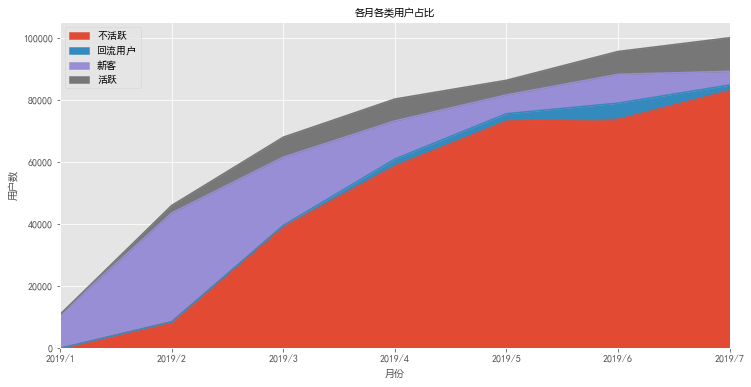

In [34]:
# 出图看看
ax = df_FenCeng_count.fillna(0).T.plot.area(figsize = (12,6))
ax.set_xlabel("月份", fontproperties=chinese)
ax.set_ylabel("用户数", fontproperties=chinese)
ax.set_title("各月各类用户占比", fontproperties=chinese)

In [35]:
# 回流占比：某个时间窗口内回流用户在总用户中的占比。
return_rate = df_FenCeng_count.apply(lambda x: x/x.sum())

In [36]:
return_rate

,2019/1,2019/2,2019/3,2019/4,2019/5,2019/6,2019/7
不活跃,NaN,0.185561,0.574250,0.731131,0.847480,0.771106,0.829494
回流用户,NaN,NaN,0.007905,0.028187,0.027835,0.054911,0.018441
新客,1.0,0.762284,0.323328,0.152996,0.069987,0.096988,0.044155
活跃,NaN,0.052155,0.094518,0.087686,0.054698,0.076995,0.107910


Text(0.5, 1.0, '每月回流用户占比')

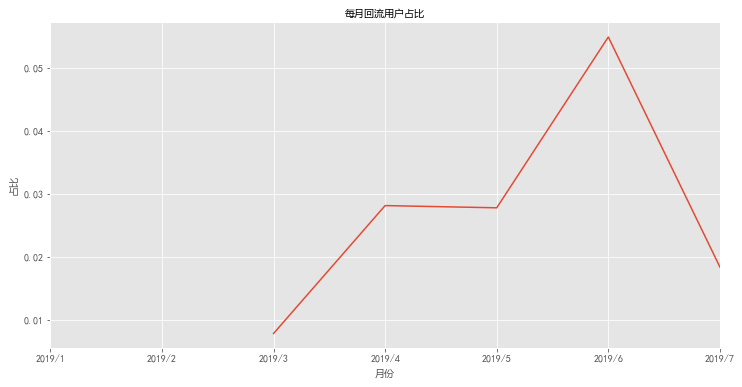

In [37]:
ax = return_rate.loc['回流用户'].plot(figsize = (12,6))
ax.set_xlabel('月份', fontproperties=chinese) 
ax.set_ylabel('占比', fontproperties=chinese) 
ax.set_title('每月回流用户占比', fontproperties=chinese)

Text(0.5, 1.0, '每月活跃用户占比')

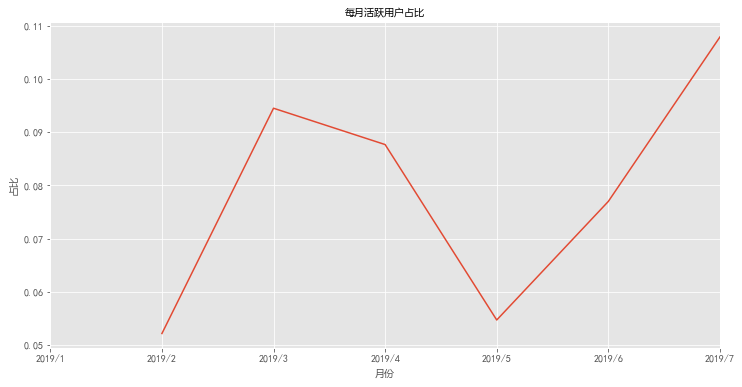

In [38]:
ax = return_rate.loc['活跃'].plot(figsize = (12,6))
ax.set_xlabel('月份', fontproperties=chinese) 
ax.set_ylabel('占比', fontproperties=chinese) 
ax.set_title('每月活跃用户占比', fontproperties=chinese)

### 用户质量：高质量用户贡献了多少消费？

In [39]:
user_amount = df.groupby("user_id").payable_rmb_amount.sum().sort_values().reset_index()
user_amount['amount_cumsum'] = user_amount.payable_rmb_amount.cumsum()

In [40]:
# user_amount.tail()

Text(0.5, 1.0, '用户累计贡献金额百分比')

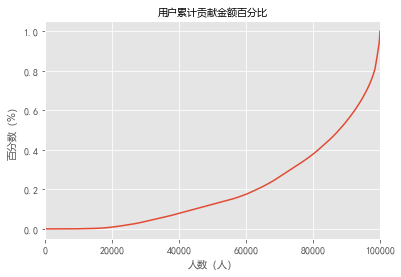

In [41]:
#计算出各阶段金额占总金额的百分比
amount_total = user_amount.amount_cumsum.max()
user_amount['prop'] = user_amount.amount_cumsum.apply(lambda x: x / amount_total)
ax = user_amount.prop.plot()
ax.set_xlabel('人数（人）', fontproperties=chinese) 
ax.set_ylabel('百分数（%）', fontproperties=chinese) 
ax.set_title('用户累计贡献金额百分比', fontproperties=chinese)

##### 典型的二八分布，共101911人中，前80000人贡献了不到40%的消费。。。

### 用户生命周期:这里我们定义第一次消费至最后一次消费为整个用户生命。

In [72]:
df_life = df

In [73]:
order_date_min = df_life.groupby('user_id').create_date.min()
order_date_min = pd.to_datetime(order_date_min)
order_date_max = df_life.groupby('user_id').create_date.max()
order_date_max = pd.to_datetime(order_date_max)

In [75]:
life_time = (order_date_max-order_date_min).reset_index()

In [80]:
life_time.to_excel("D:/work/数据分析报告/新建文件夹/自营商城数据分析190829/life_time.xlsx",index=False)

In [78]:
life_time.head(30)

,user_id,create_date
0,3,0 days 00:00:00
1,11,0 days 00:00:00
2,13,0 days 00:00:00
3,16,1 days 23:14:00
4,35,0 days 00:00:00
5,37,105 days 02:15:00
6,39,93 days 12:36:00
7,58,0 days 00:00:00
8,68,34 days 18:48:00
9,69,0 days 00:00:00


In [77]:
life_time.describe()

,user_id,create_date
count,1.001020e+05,100102
mean,5.733906e+06,20 days 14:26:31.957603
std,4.123792e+06,39 days 06:55:30.256647
min,3.000000e+00,-27 days +21:12:00
25%,2.197772e+06,0 days 00:00:00
50%,4.599300e+06,0 days 00:00:00
75%,9.534100e+06,26 days 03:12:30
max,1.697181e+07,209 days 00:34:00


##### 用户平均生命周期为24天，超过一半的用户的首次购买也是最后消费，75分为天数为31天，大约均值，即最后25%的用户是为对商城贡献由主要贡献的高质量用户

In [45]:

import datetime
d1 = datetime.datetime(2019,1,1)   # 第一个日期
d2 = datetime.datetime(2019,7,31)   # 第二个日期
interval = d2 - d1                   # 两日期差距
interval.days 


211

In [46]:
life_time['life_time'] = life_time.create_date/np.timedelta64(1,'D')


In [47]:
len(life_time[life_time.life_time > 0])

36356

Text(0.5, 1.0, '二次消费以上用户的生命周期直方图')

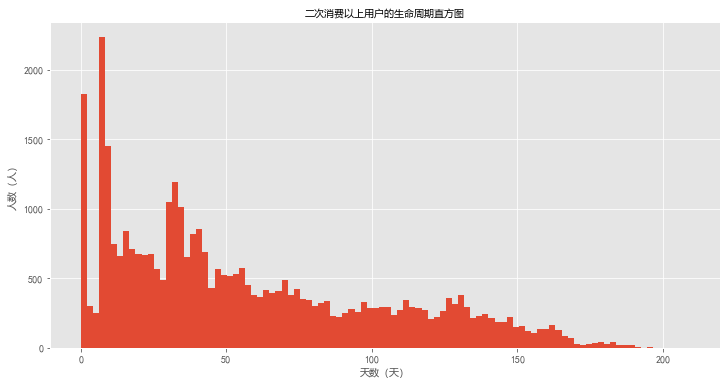

In [48]:
ax = life_time[life_time.life_time > 0].life_time.hist(bins =100,figsize = (12,6))
ax.set_xlabel('天数（天）', fontproperties=chinese) 
ax.set_ylabel('人数（人）', fontproperties=chinese) 
ax.set_title('二次消费以上用户的生命周期直方图', fontproperties=chinese)

In [49]:
# 生命周期在200天以上的用户数
len(life_time[life_time.life_time > 150])

1434

In [50]:
# 生命周期总用户数平均值
life_time[life_time.life_time > 0].life_time.mean()

57.38792186984268

##### 二次购买两次以上的用户生命周期为62天，根据运营角度说明，应该更多引导用户二次消费，从而提高用户生命周期，能带来2倍的增量。

### 留存率：第一次消费后有多少比率进行第二次消费

In [68]:
df_retention = df

In [69]:
user_purchase_retention = pd.merge(left = df_retention, 
                                   right = order_date_min.reset_index(), 
                                   how = 'inner', 
                                   on = 'user_id', 
                                   suffixes=('', '_min'))


In [70]:
user_purchase_retention.head()

,user_id,create_date,payable_rmb_amount,buy_num,date,month,create_date_min
0,3059210,2019/1/1 7:32,7.0,1,2019/1/1,2019/1,2019-01-01 07:32:00
1,3059210,2019/2/11 20:54,7.0,1,2019/2/11,2019/2,2019-01-01 07:32:00
2,2055349,2019/1/1 7:38,7.0,1,2019/1/1,2019/1,2019-01-01 07:38:00
3,9457140,2019/1/1 8:46,7.0,1,2019/1/1,2019/1,2019-01-01 08:46:00
4,9457140,2019/1/24 10:44,0.1,1,2019/1/24,2019/1,2019-01-01 08:46:00


In [71]:
user_purchase_retention["create_date"] = pd.to_datetime(user_purchase_retention["create_date"])

In [55]:
# user_purchase_retention.info()

In [56]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.create_date - user_purchase_retention.create_date_min

# user_purchase_retention.head(30)

In [ ]:
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D'))


In [ ]:
user_purchase_retention = user_purchase_retention.sort_values(by="order_date_diff",ascending=True)

In [57]:
# user_purchase_retention[user_purchase_retention["user_id"]  == 190368 ]

In [58]:
bin = [0,30,60,90,120,150,180]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)
# user_purchase_retention.head(20)

In [59]:
pivoted_retention= user_purchase_retention.groupby(['user_id','date_diff_bin']).payable_rmb_amount.sum().unstack()
# pivoted_retention.head(10)

In [60]:
pivoted_retention2= user_purchase_retention.groupby(['user_id','date_diff_bin']).buy_num.sum().unstack()
# pivoted_retention2.head(10)

Text(0.5, 1.0, '各时间段的用户留存率')

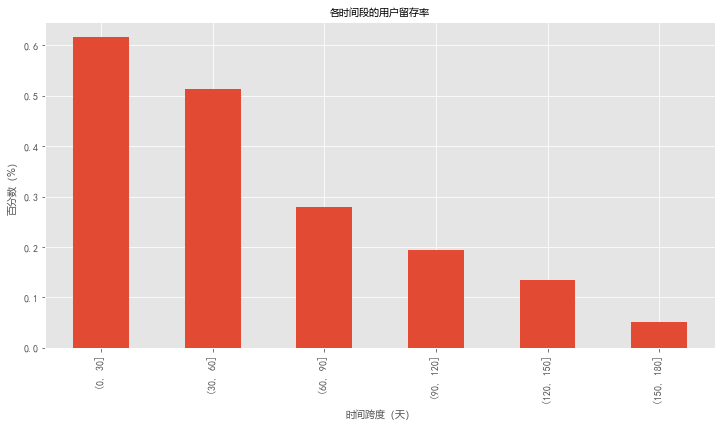

In [61]:
# 直接用金额表达不出留存率，我们还是按照之前的算法，把消费过的转换成1，未消费过的转换成0，毕竟留存率看的是是否有消费。
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x >0 else 0)
ax = (pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar(figsize = (12,6))
ax.set_xlabel('时间跨度（天）', fontproperties=chinese) 
ax.set_ylabel('百分数（%）', fontproperties=chinese) 
ax.set_title('各时间段的用户留存率', fontproperties=chinese)

##### 由上图可知，头一个月留存高达65%，次月留存也在50%左右。但是第三个月就掉到30%以下。从第三个月开始就趋势性减少。从运营角度来看，这对刺激引导消费的活动或营销政策应该集中在前两个月开始使用，特别的第一个月。

##### 为了更好的确定营销节点，在看下平均购买周期。

### 平均购买周期：用户两次购买之间的间隔

In [62]:
#创建函数，返回时间差
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    return d

In [63]:
user_purchase_retention = user_purchase_retention.sort_values(by="order_date_diff",ascending=True)

In [64]:
last_diff = user_purchase_retention.groupby('user_id').apply(diff)

In [65]:
last_dd = last_diff.reset_index()

Text(0.5, 1.0, '用户平均购买周期直方图')

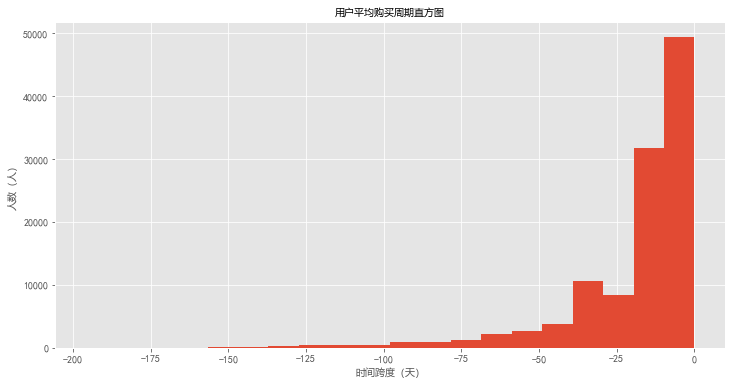

In [66]:
fig, ax = plt.subplots(figsize = (12,6))
ax = last_diff.hist(bins = 20)
ax.set_xlabel('时间跨度（天）', fontproperties=chinese) 
ax.set_ylabel('人数（人）', fontproperties=chinese) 
ax.set_title('用户平均购买周期直方图', fontproperties=chinese)